In [7]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [2]:
directory = '/home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/' # home
# directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03' # uni
b = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        b.append(bagreader(f))

[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response4 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response3 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response5 already exists. Not creating.


### List of available topics 

In [4]:
# Get topics in bag
b[0].topic_table

,Topics,Types,Message Count,Frequency
0,exp_data,sync_msgs/ExperimentData,1,NaN
1,q,sync_msgs/CustomData,80200,200.000640
2,response,sync_msgs/response,20,0.049987
3,state,sync_msgs/SyncQ,80189,200.000640
4,traj,sync_msgs/CustomData,80200,200.000640


### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [3]:
# Make csv of given topics
meta_data_list = []
state_msg_list = []
response_msg_list = []
ref_msg_list = []
for bag in b:
    meta_data_list.append(bag.message_by_topic('exp_data'))
    state_msg_list.append(bag.message_by_topic('state'))
    response_msg_list.append(bag.message_by_topic('response'))
    ref_msg_list.append(bag.message_by_topic('traj'))

### Create pandas data frames from csv files

Function to convert csv to data frame:

In [4]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [5]:
# Turn csv into dataframes
meta_df_list = csv2df(meta_data_list)
state_df_list = csv2df(state_msg_list)
response_df_list = csv2df(response_msg_list)
ref_df_list = csv2df(ref_msg_list)

In [6]:
# Only for now rising time is not being recorded correctly
for df in response_df_list:
    df['rise_t'] = df['rise_t'] - 10

#### General information on collected data

In [14]:
# Experiment Information
meta_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,mode,mass_0,mass_1,mass_2,trials_0,trials_1,trials_2,trial_length
0,89.433997,0,89,433996702,NaN,TRIAL,0.0,1.0,2.0,6.0,7.0,7.0,20.0


In [15]:
# Response Analysis Data
response_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,overshoot,rise_t,settle_t,ringing
0,109.443993,0,109,443993418,NaN,0.752514,11.465002,0.0,0.0
1,129.458991,1,129,458990736,NaN,0.951712,11.544998,0.0,0.0
2,149.463992,2,149,463992173,NaN,0.067395,13.030001,0.0,0.0
3,169.473991,3,169,473991161,NaN,1.119317,11.610000,0.0,0.0
4,189.483990,4,189,483990128,NaN,1.241312,12.049993,0.0,0.0
5,209.483997,5,209,483996771,NaN,1.541591,11.350005,0.0,0.0
6,229.493990,6,229,493990164,NaN,2.245894,11.609999,0.0,0.0
7,249.503992,7,249,503991983,NaN,0.502086,11.664998,0.0,0.0
8,269.518996,8,269,518996006,NaN,0.697066,11.529996,0.0,0.0
9,289.528992,9,289,528991787,NaN,1.117684,11.524993,0.0,0.0


In [16]:
ref_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,value.data
0,90.442122,17887,90,442121777,NaN,30.0
1,90.443992,17888,90,443991895,NaN,30.0
2,90.448994,17889,90,448994471,NaN,30.0
3,90.454004,17890,90,454003519,NaN,30.0
4,90.458999,17891,90,458999453,NaN,30.0
...,...,...,...,...,...,...
80198,491.428989,98085,491,428989023,NaN,30.0
80199,491.433995,98086,491,433995125,NaN,30.0
80200,491.438990,98087,491,438989976,NaN,30.0
80201,491.443990,98088,491,443989957,NaN,30.0


In [17]:
state_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,state.q_state.q,state.q_state.qd,state.q_state.qdd,state.tau,state.force_up,state.force_down,high
0,89.443992,17888,89,443991895,NaN,34.396903,-1.153719,2.163460,0.000000,0.000000,0.0,False
1,89.448994,17889,89,448994471,NaN,34.396903,-1.153719,2.163460,0.000000,0.000000,0.0,False
2,89.454004,17890,89,454003519,NaN,34.391359,-1.108888,8.966146,0.000000,0.000000,0.0,False
3,89.458999,17891,89,458999453,NaN,34.386030,-1.065799,8.617744,0.000000,0.000000,0.0,False
4,89.463987,17892,89,463987411,NaN,34.380908,-1.024385,8.282879,0.000000,0.000000,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80191,490.428989,98085,490,428989023,NaN,28.443606,1.995656,1.328071,0.023596,0.017006,0.0,False
80192,490.433995,98086,490,433995125,NaN,28.453617,2.002248,1.318424,0.023608,0.017015,0.0,False
80193,490.438990,98087,490,438989976,NaN,28.463661,2.008793,1.308875,0.023621,0.017024,0.0,False
80194,490.443990,98088,490,443989957,NaN,28.473742,2.016122,1.465866,0.024416,0.017597,0.0,False


## Plot Data

### Plot State Information

#### Helper Functions for plotting state information

In [79]:
def draw_mass_background(start_time, Mass_Order, Mass_Trial, Trial_Length, Delay, axis, min, max):
    """
    state_Df: experiment start time
    Mass_Order: float/int list of mass (in order)
    Mass_Trial: int list with number of trials per mass. Must have same length as Mass_Order
    Trial_Length: float/int of length of trial
    Delay: int (for now) of delay between state and reference.
    axis: matplotlib axis to plot on
    min: min value of plot
    max: max value of plot
    """
    i = 0
    trial_start = 0
    trial_end = 0
    for mass in Mass_Order:
        if i == 0:
            trial_end = start_time + Mass_Trial[i]*Trial_Length + Delay
        else:
            trial_end = trial_start + Mass_Trial[i]*Trial_Length
        
        if mass == 0.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='green')
        elif mass == 1.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='yellow')
        elif mass == 2.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='red')
        trial_start = trial_end
        i = i + 1


In [80]:
def generic_plot(variable, axis, background, state_dataframe, ref_dataframe, meta_dataframe):
    variable = 'state.' + variable
    axis.plot('Time', variable, data= state_dataframe, color = 'red', linewidth = 1.0)
    if background:
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
        trial_length = meta_dataframe['trial_length'].iloc[0]
        delay = 1.0 # TODO: include delay into meta dataframe
        draw_mass_background(state_dataframe['Time'].iloc[0], mass_order, mass_trial, trial_length, delay, axis, state_dataframe[variable].min(), state_dataframe[variable].max())
    axis.set_xlim((state_dataframe['Time'].iloc[0], ref_dataframe['Time'].iloc[-1]))
    axis.set_ylim((state_dataframe[variable].min(), state_dataframe[variable].max()))

def plot_q(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot('Time', 'value.data', data=ref_dataframe, color='black', linewidth=1.0)
        axis.set_title('q vs reference')
    else:
        axis.set_title('q')
    generic_plot('q_state.q', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Angle (deg)')
    axis.grid()

def plot_qd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], ref_dataframe['value.data']-55, color='k', linewidth = 0.8)
        axis.set_title('qd & reference')
    else:
        axis.set_title('qd')
    generic_plot('q_state.qd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Velocity (deg/s)')
    axis.grid()

def plot_qdd(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)*3, color='k', linewidth = 0.8)
        axis.set_title('qdd & reference')
    else:
        axis.set_title('qdd')
    generic_plot('q_state.qdd', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Accel (deg/s^2)')
    axis.grid()

def plot_tau(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    if reference:
        axis.plot(ref_dataframe['Time'], (ref_dataframe['value.data']-55)/100, color='k', linewidth = 0.8)
        axis.set_title('Tau & Reference')
    else:
        axis.set_title('Tau')
    generic_plot('tau', axis, background, state_dataframe, ref_dataframe, meta_dataframe)
    axis.set_ylabel('Torque ')
    axis.grid()

def plot_state(plot_list, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    """
    plot_list: string list of data to plot. q, qd, qdd and tau are possible
    background: boolean whether background should be colored based on mass
    reference: boolean whether to plot reference trajectory
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for plot in plot_list:
        if plot == 'q':
            plot_q(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qd':
            plot_qd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'qdd':
            plot_qdd(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        elif plot == 'tau':
            plot_tau(axs[i], background, reference, state_dataframe, ref_dataframe, meta_dataframe)
        i = i + 1
    return fig, axs

#### Plot Specified State for 1 trial

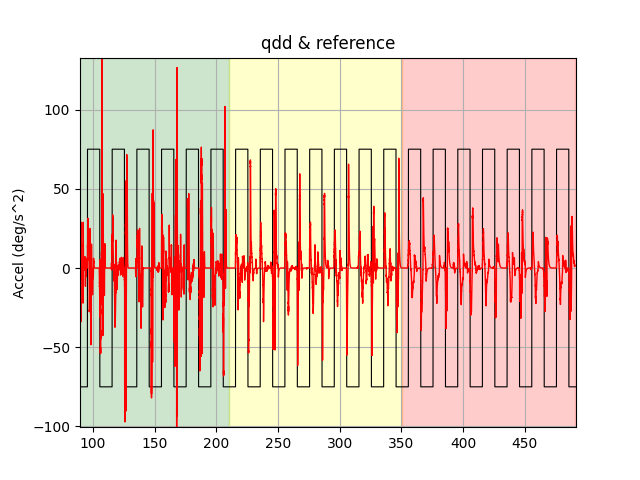

In [82]:
fig, ax = plt.subplots()
plot_qdd(ax, True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])

#### Plot specified state for all trials

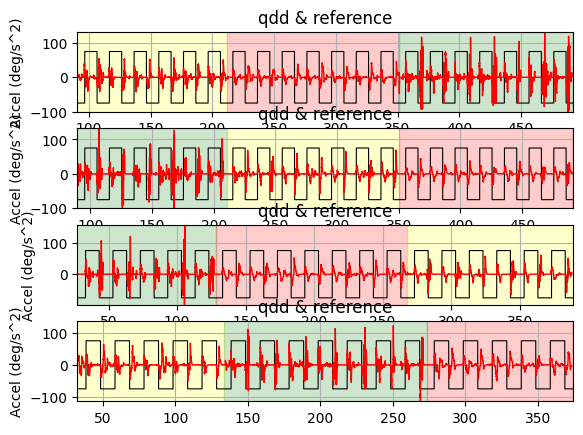

In [67]:
fig, axes = plt.subplots(len(state_df_list))
i = 0
for trial in state_df_list:
    plot_qdd(axes[i], True, True, trial, ref_df_list[i], meta_df_list[i])
    i = i + 1

#### Plot all States for 1 trial

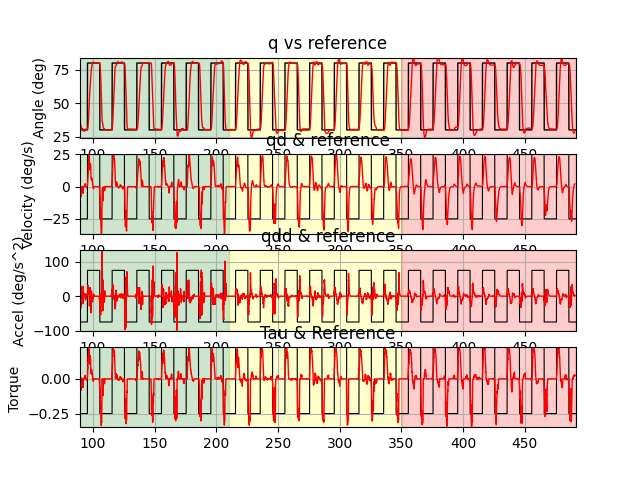

In [81]:
fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, state_df_list[0], ref_df_list[0], meta_df_list[0])

#### Plot state for all trials

Trial  1
Trial  2
Trial  3
Trial  4


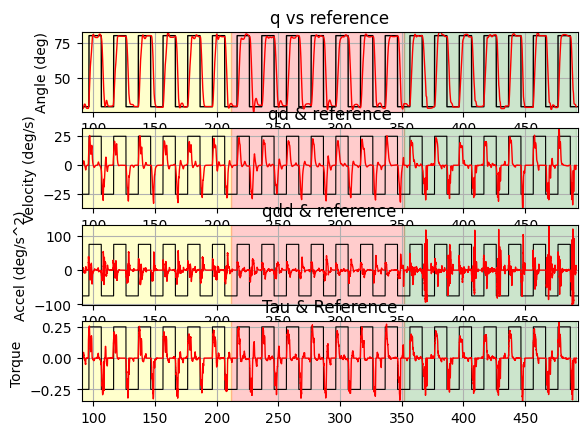

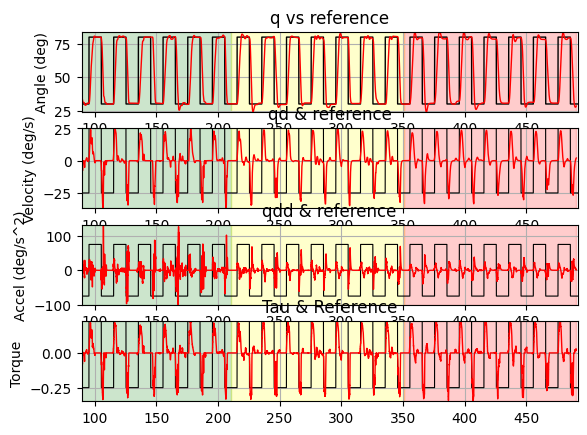

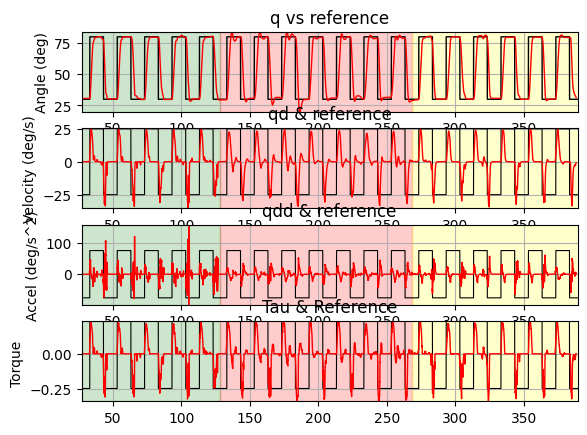

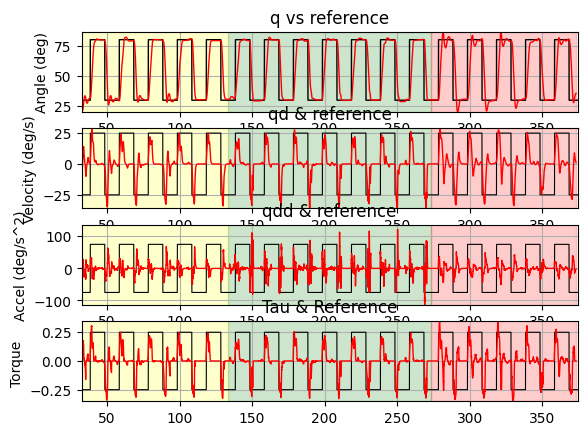

In [66]:
fig_list = []
axis_list = []
i = 0
for trial in state_df_list:
    fig, axes = plot_state(['q', 'qd', 'qdd', 'tau'], True, True, trial, ref_df_list[i], meta_df_list[i])
    fig_list.append(fig)
    axis_list.append(axes)
    i = i + 1

### Plot Response Information

#### Helper Functions

In [75]:
def generic_response(response, axis, meta_dataframe, response_dataframe):
    axis.grid()
    axis.set_axisbelow(True)

    mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
    mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
    i = 0
    trial = 0
    for mass in mass_order:
        color = ''
        if mass == 0.0:
            color = 'green'
        elif mass == 1.0:
            color = 'orange'
        elif mass == 2.0:
            color = 'red'
        axis.bar(response_dataframe['header.seq'].iloc[trial:int(trial+mass_trial[i])]+1, response_dataframe[response].iloc[trial:int(trial+mass_trial[i])], color=color, alpha=0.7)
        trial = int(trial + mass_trial[i])
        i = i + 1
    
    trial_total = sum(mass_trial)
    axis.set_xlim((1 - 0.5, trial_total + 0.5))
    axis.set_xticks(np.arange(1, trial_total+1))

def plot_rising(axis, meta_dataframe, response_dataframe):
    generic_response('rise_t', axis, meta_dataframe, response_dataframe)
    axis.set_title('Rising Time (90%)')
    axis.set_ylabel('Time (s)')
    

def plot_overshoot(axis, meta_dataframe, response_dataframe):
    generic_response('overshoot', axis, meta_dataframe, response_dataframe)
    axis.set_title('Overshoot')
    axis.set_ylabel('Angle (deg)')

def plot_settling(axis):
    pass

def plot_ringing(axis):
    pass

def plot_response(plot_list, meta_dataframe, response_dataframe):
    """
    plot_list: string list 
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for response in plot_list:
        if response == 'rise_t':
            plot_rising(axs[i], meta_dataframe, response_dataframe)
        elif response == 'overshoot':
            plot_overshoot(axs[i], meta_dataframe, response_dataframe)
        elif response == 'settle_t':
            plot_settling(axs[i], meta_dataframe, response_dataframe)
        elif response == 'ringing':
            plot_ringing(axs[i], meta_dataframe, response_dataframe)
        i = i + 1
            
    return fig, axs

#### Plot Specified Response

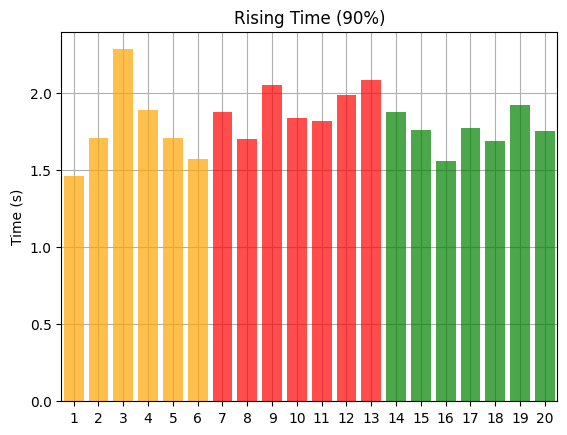

In [71]:
fig, axis = plt.subplots()

plot_rising(axis, meta_df_list[0], response_df_list[0])

#### Plot All Responses for 1 trial

0

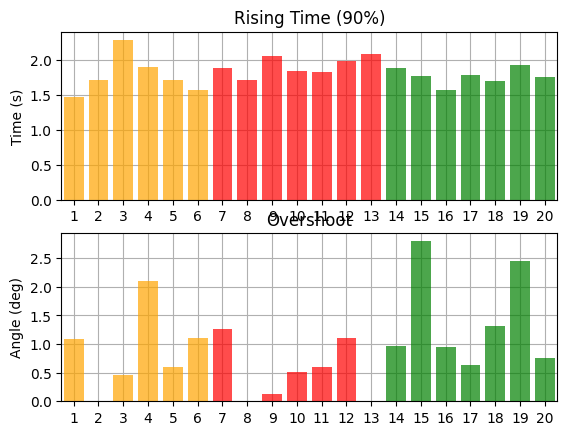

In [61]:
plot_response(['rise_t', 'overshoot'], meta_df_list[0], response_df_list[0])

#### Plot respones for all trials

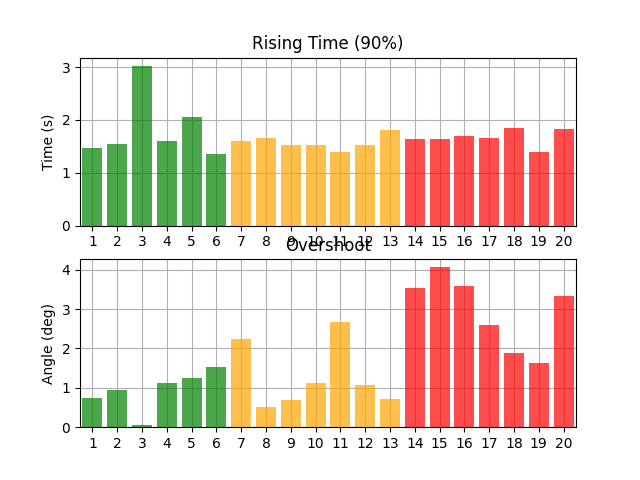

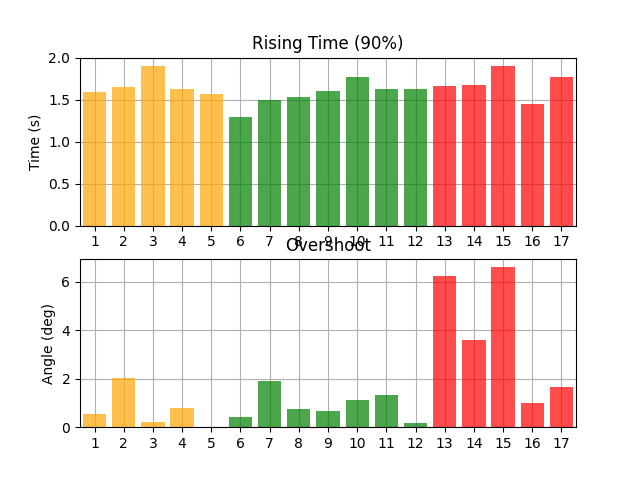

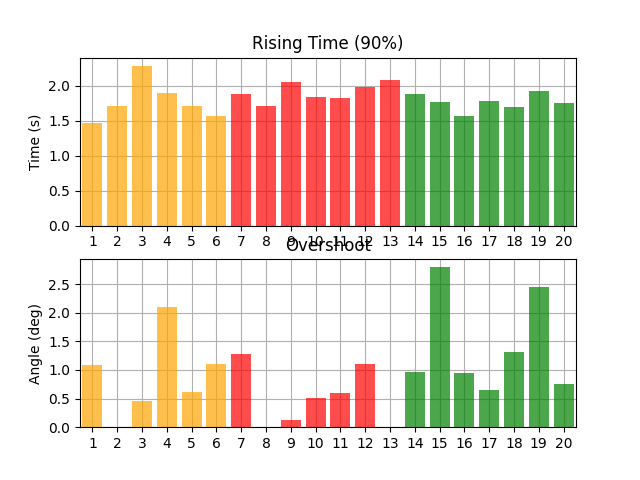

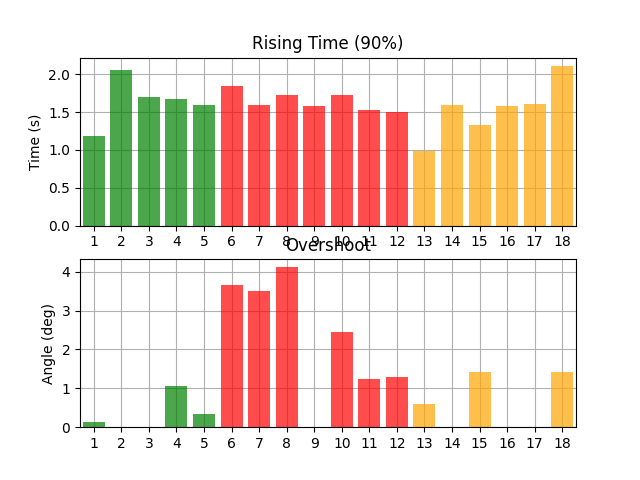

In [76]:
fig_list = []
axis_list = []
i = 0
for trial in state_df_list:
    fig, axes = plot_response(['rise_t', 'overshoot'], meta_df_list[i], response_df_list[i])
    fig_list.append(fig)
    axis_list.append(axes)
    i = i + 1

## Analyse Data

#### Response for 1 trial

In [77]:
trial = 0 
response = 'rise_t'
meta_dataframe = meta_df_list[trial]
response_dataframe = response_df_list[trial]
mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

i = 0
trial_it = 0
response_avg = []
for trials in mass_trial:
    next = int(trial_it + trials)
    response_avg.append(response_dataframe[response].iloc[trial_it : next].mean())
    trial_it = next
    i = i + 1

j = 0
for trial in response_avg:
    print(response, " for ", mass_order[j], "kg is ", trial)
    j = j + 1
# TODO: standard deviation

rise_t  for  0.0 kg is  1.8416664420000002
rise_t  for  1.0 kg is  1.5792844495714284
rise_t  for  2.0 kg is  1.6714280932857146


In [78]:
trial = 0 
response = 'overshoot'
meta_dataframe = meta_df_list[trial]
response_dataframe = response_df_list[trial]
mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

i = 0
trial_it = 0
response_avg = []
for trials in mass_trial:
    next = int(trial_it + trials)
    response_avg.append(response_dataframe[response].iloc[trial_it : next].mean())
    trial_it = next
    i = i + 1

j = 0
for trial in response_avg:
    print(response, " for ", mass_order[j], "kg is ", trial)
    j = j + 1
# TODO: standard deviation

overshoot  for  0.0 kg is  0.9456400062828317
overshoot  for  1.0 kg is  1.2917717752318103
overshoot  for  2.0 kg is  2.9477574741254875


#### Average response over all experiments trials per mass

In [68]:
def calculate_response(response, state_df_list, response_df_list, meta_df_list):
    tmp_list = [[], [], []]
    i = 0
    for df in state_df_list:
        meta_dataframe = meta_df_list[i]
        response_dataframe = response_df_list[i]
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]

        j = 0
        trial_it = 0
        for trials in mass_trial:
            next = int(trial_it + trials)
            if mass_order[j] == 0.0:
                tmp_list[0].append(response_dataframe[response].iloc[trial_it:next])
            elif mass_order[j] == 1.0:
                tmp_list[1].append(response_dataframe[response].iloc[trial_it:next])
            elif mass_order[j] == 2.0:
                tmp_list[2].append(response_dataframe[response].iloc[trial_it:next])
            trial_it = next
            j = j + 1
        i = i + 1
    response_list = []
    for mass_response in tmp_list:
        response_list.append(pd.concat(mass_response, ignore_index=True))

    return response_list

In [73]:
rising_list = calculate_response('rise_t', state_df_list, response_df_list, meta_df_list)
overshoot_list = calculate_response('overshoot', state_df_list, response_df_list, meta_df_list)

print("Mass 0 rising time: ", rising_list[0].mean(), " +/- ", rising_list[0].std())
print("Mass 1 rising time: ", rising_list[1].mean(), " +/- ", rising_list[1].std())
print("Mass 2 rising time: ", rising_list[2].mean(), " +/- ", rising_list[2].std())
print("")
print("Mass 0 overshoot: ", overshoot_list[0].mean(), " +/- ", overshoot_list[0].std())
print("Mass 1 overshoot: ", overshoot_list[1].mean(), " +/- ", overshoot_list[1].std())
print("Mass 2 overshoot: ", overshoot_list[2].mean(), " +/- ", overshoot_list[2].std())

Mass 0 rising time:  1.70199984984  +/-  0.34667414570806276
Mass 1 rising time:  1.6347907903749999  +/-  0.2539959886609684
Mass 2 rising time:  1.731730506846154  +/-  0.17484817619652304

Mass 0 overshoot:  0.9375131675636158  +/-  0.7123006068144714
Mass 1 overshoot:  0.891212505238545  +/-  0.7694512337291112
Mass 2 overshoot:  2.291672456966237  +/-  1.8306418787829832
